<a href="https://colab.research.google.com/github/SiracencoSerghei/Statistics_and_ML/blob/main/2.3_dataNormOutliers/stats_normOutliers_trimming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SECTION: Data normalizations and outliers
# Data trimming to remove outliers

In [1]:
import numpy as np
import matplotlib.pyplot as plt

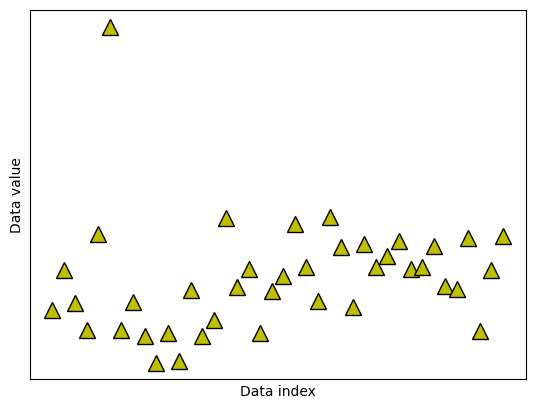

In [5]:
# Step 1: Set the number of data points to generate
N = 40

# Step 2: Generate N random numbers from a normal (Gaussian) distribution
data = np.random.randn(N)

# Step 3: If any of the values are less than -2, square them and negate the result
# This pushes extreme negative values further away from 0.
data[data < -2] = -data[data < -2] ** 2

# Step 4: If any of the values are greater than 2, square them
# This pushes extreme positive values further from 0.
data[data > 2] = data[data > 2] ** 2

# Step 5: Mean-center the data by subtracting the mean from each data point
dataMC = data - np.mean(data)

# Step 6: Create a plot to visualize the data
# Create a figure and axis for plotting
fig, ax = plt.subplots(1, 1)

# Step 7: Plot the original data as yellow triangles
# 'k^' means black-colored triangles, 'markerfacecolor' makes the triangle yellow, 'markersize=12' sets the size of the markers
ax.plot(data, 'k^', markerfacecolor='y', markersize=12)

# Step 8: Remove tick marks on both x and y axes to simplify the plot
ax.set_xticks([])
ax.set_yticks([])

# Step 9: Label the x-axis as "Data index"
ax.set_xlabel('Data index')

# Step 10: Label the y-axis as "Data value"
ax.set_ylabel('Data value')

# Step 11: Display the plot
plt.show()


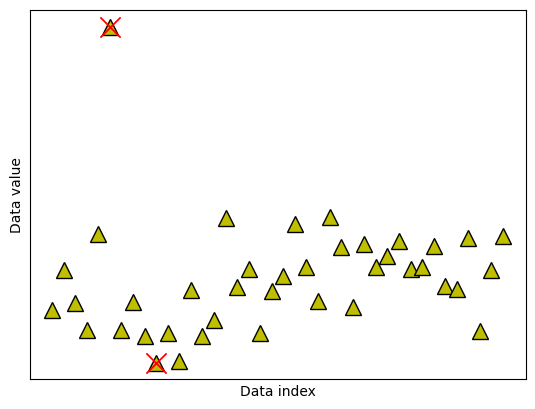

In [7]:
## option 1: remove k% of the data

# Step 1: Define the percentage of extreme data values to remove (e.g., 5%)
trimPct = 5  # The percentage of the most extreme data values to be trimmed

# Step 2: Calculate the cut-off value beyond which data will be considered extreme
# Using the absolute value of the mean-centered data (dataMC), find the cut-off point at the 95th percentile (100 - trimPct)
datacutoff = np.percentile(abs(dataMC), 100 - trimPct)

# Step 3: Identify the indices of data points whose absolute value exceeds the cut-off
# These are considered extreme values (above the calculated threshold)
data2cut = np.where(abs(dataMC) > datacutoff)[0]

# Step 4: Mark the extreme data points on the existing plot
# The extreme values are plotted as red 'x' markers with a size of 15
ax.plot(data2cut, data[data2cut], 'rx', markersize=15)

# Step 5: The figure (fig)
fig

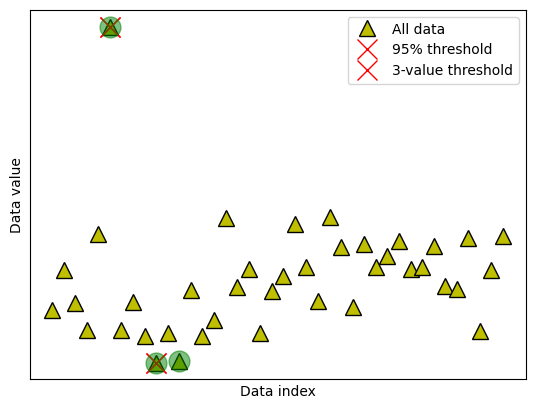

In [8]:
## option 2: remove k most extreme values

# Step 1: Define the number of extreme data values to remove
k2remove = 3  # Number of extreme values to be removed (3 in this case)

# Step 2: Sort the data by the absolute mean-centered values
# This sorts the data indices in descending order based on the absolute deviation from the mean
# `np.argsort` returns the indices of the sorted array, and `[::-1]` reverses the order (so the most extreme values come first)
datasortIdx = np.argsort(abs(dataMC), axis=0)[::-1]

# Step 3: Select the indices of the k most extreme values
# `np.squeeze` removes any extra dimensions that result from the indexing, leaving a flat array of indices for the top k extreme values
data2cut = np.squeeze(datasortIdx[:k2remove])

# Step 4: Mark these extreme values on the plot
# The k most extreme values are plotted as green 'o' markers, with a size of 15 and a transparency (alpha) of 0.5
ax.plot(data2cut, data[data2cut], 'go', markersize=15, alpha=.5)

# Step 5: Add a legend to the plot
# The legend explains the meaning of the markers: 'All data' (original dataset), '%g%% threshold' (trimmed based on percentage), and '%g-value threshold' (trimmed based on a fixed number of extreme values)
ax.legend(('All data', '%g%% threshold' % (100 - trimPct), '%g-value threshold' % k2remove))

# Step 6: The figure (fig) is used to display the plot
fig